In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [42]:
# 为数据制作features 和label 
cols = ["fLength","fWidth","fSize",'fCone','Fconc1','FAsym','FM3Long','Fm3Trans',"fAlpha",'fDist','class']
df = pd.read_csv(r"C:\Users\19390\Desktop\project\machineLearing\magic04.data",names = cols)
df.head()


fLength    fWidth   fSize   fCone  Fconc1     FAsym  FM3Long  Fm3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df['class']=(df['class'] == "g").astype(int)

In [8]:
df.head()

fLength    fWidth   fSize   fCone  Fconc1     FAsym  FM3Long  Fm3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

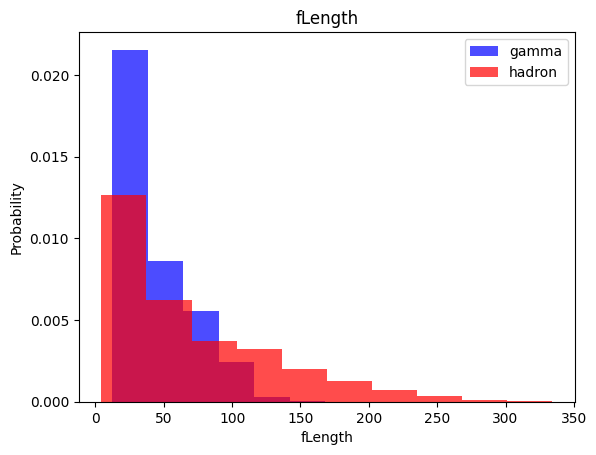

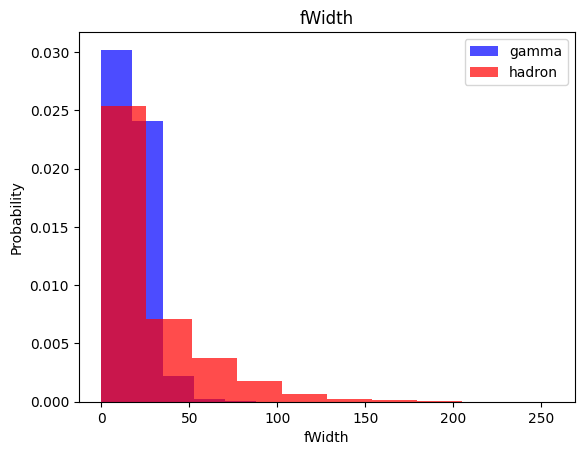

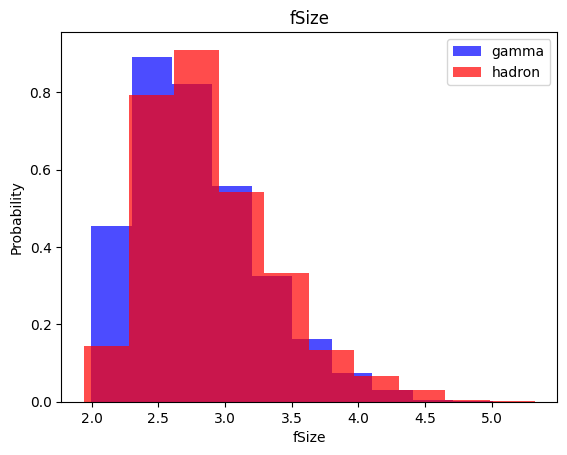

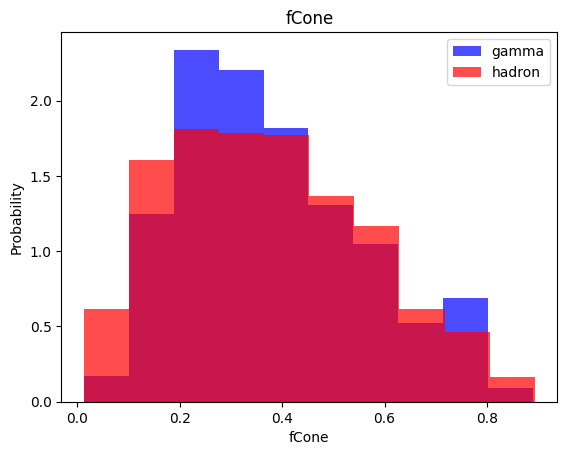

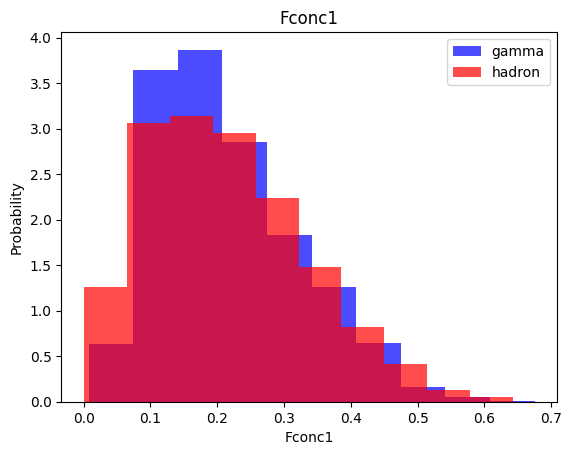

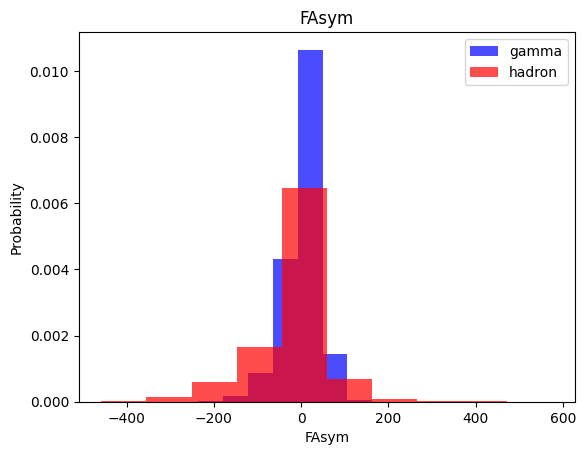

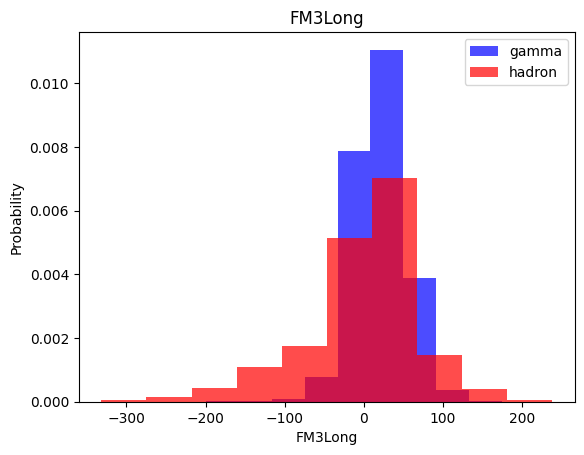

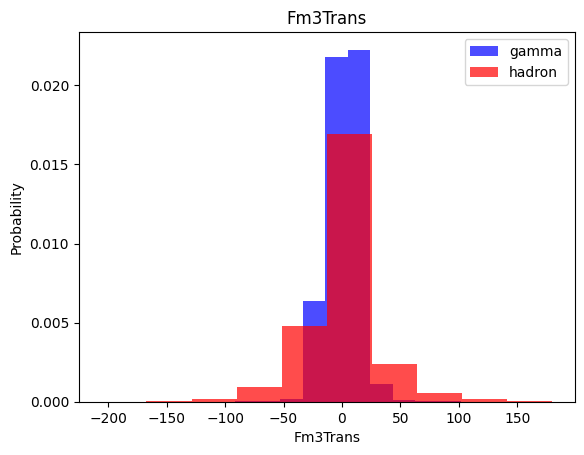

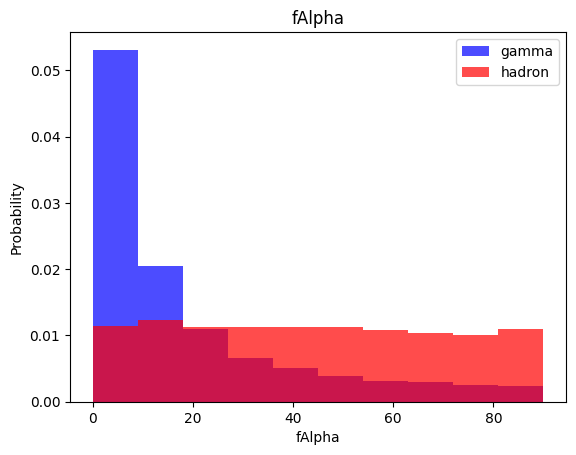

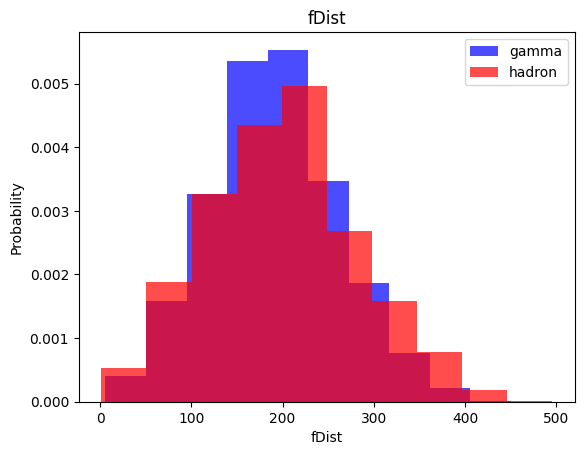

In [9]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color="blue",label="gamma",alpha =0.7,density=True)
    plt.hist(df[df['class']==0][label],color="red",label="hadron",alpha =0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train,validation,test datasets

In [10]:
# df.smaple(frac=1) 将数据打乱,train60%,valid20% , 数组里的是结束位置
train ,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

c:\Users\19390\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
# 对所有数据进行缩放
def scale_dataset(dataframe,oversample = False):
    X= dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    #发现gamma的数量和强子的相差太大，需要进行随机过采样器
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y) #这样的会从少的那里继续采样，知道这两相差不大

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y
    

In [12]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report  #引入报告

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5) #k取1
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1286
           1       0.88      0.81      0.84      2518

    accuracy                           0.80      3804
   macro avg       0.78      0.80      0.79      3804
weighted avg       0.81      0.80      0.80      3804



# Navie Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52      1286
           1       0.75      0.82      0.78      2518

    accuracy                           0.70      3804
   macro avg       0.66      0.65      0.65      3804
weighted avg       0.69      0.70      0.69      3804



# Log Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68      1286
           1       0.87      0.74      0.80      2518

    accuracy                           0.76      3804
   macro avg       0.74      0.76      0.74      3804
weighted avg       0.78      0.76      0.76      3804



# SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svc_model = SVC()
svc_model =svc_model.fit(X_train,y_train)

In [25]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1286
           1       0.91      0.82      0.86      2518

    accuracy                           0.83      3804
   macro avg       0.81      0.83      0.82      3804
weighted avg       0.84      0.83      0.83      3804



 # ML

In [26]:
import tensorflow as tf

In [32]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [37]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(
        X_train,y_train,epochs=epochs,batch_size = batch_size,validation_split = 0.2,verbose=0
    )
    return nn_model,history

16 nodes, dropout 0, lr 0.01, batch size 32


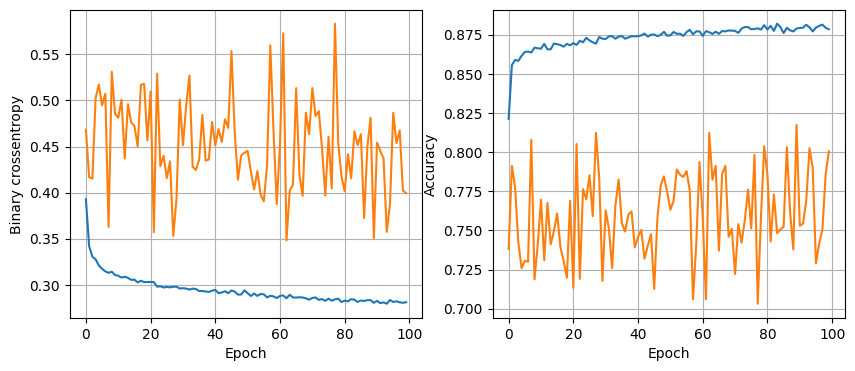

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8511 - loss: 0.3527
16 nodes, dropout 0, lr 0.01, batch size 64


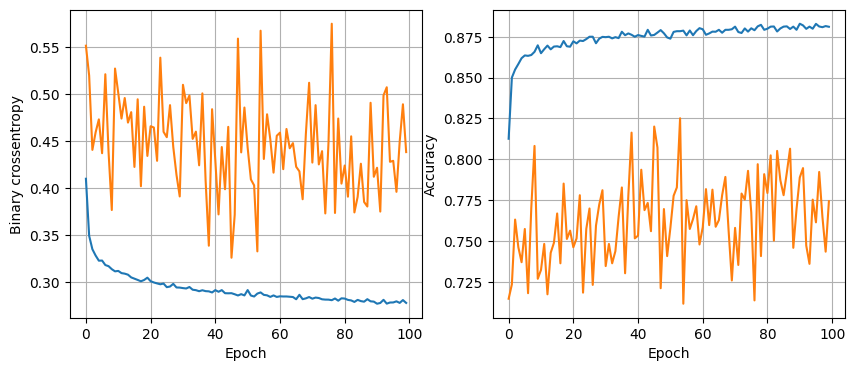

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8662 - loss: 0.3366
16 nodes, dropout 0, lr 0.01, batch size 128


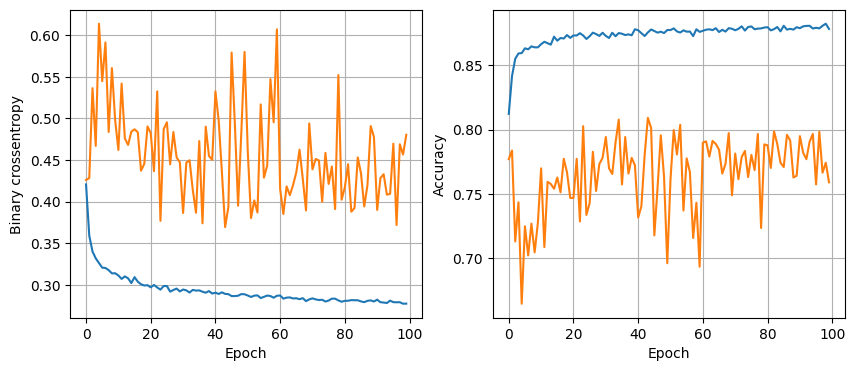

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8596 - loss: 0.3336
16 nodes, dropout 0, lr 0.005, batch size 32


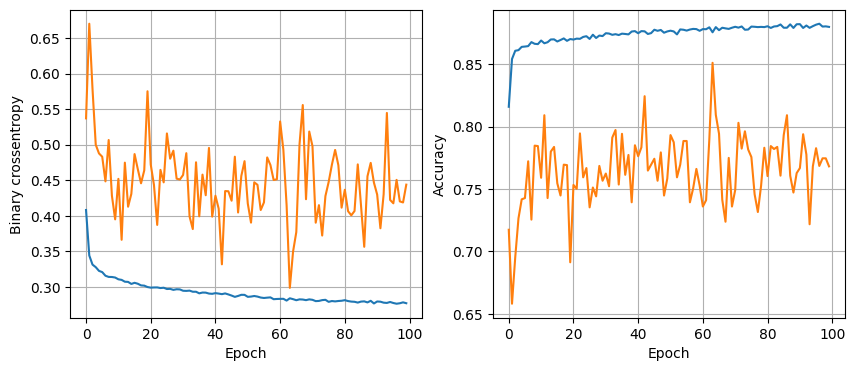

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8574 - loss: 0.3415
16 nodes, dropout 0, lr 0.005, batch size 64


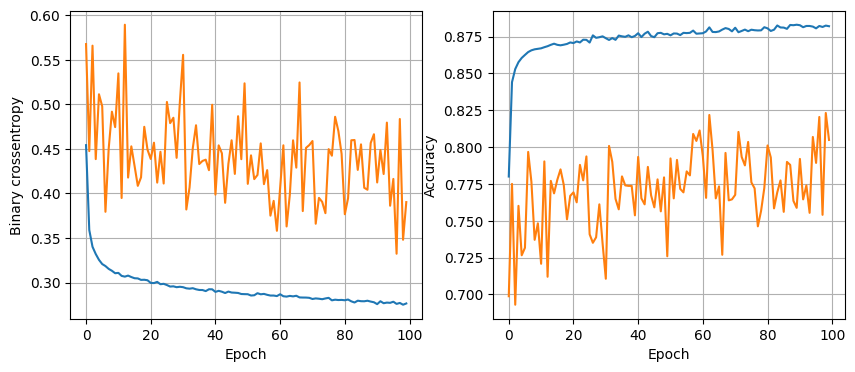

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8577 - loss: 0.3420
16 nodes, dropout 0, lr 0.005, batch size 128


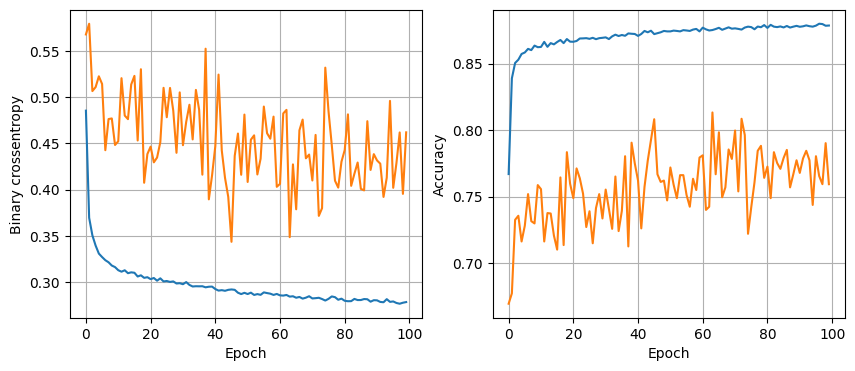

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8712 - loss: 0.3132
16 nodes, dropout 0, lr 0.001, batch size 32


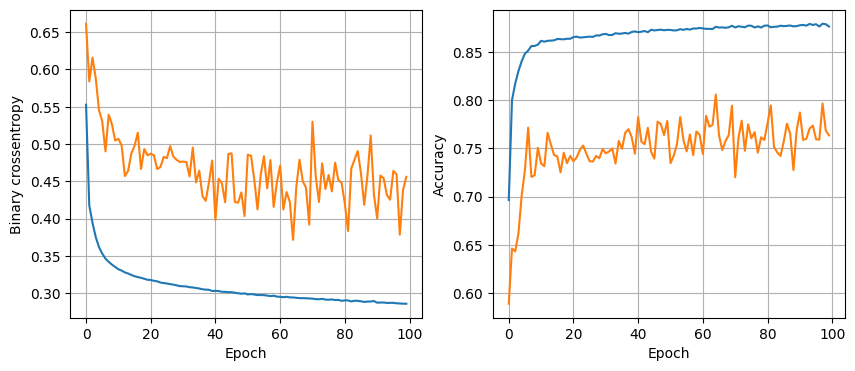

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3203  
16 nodes, dropout 0, lr 0.001, batch size 64


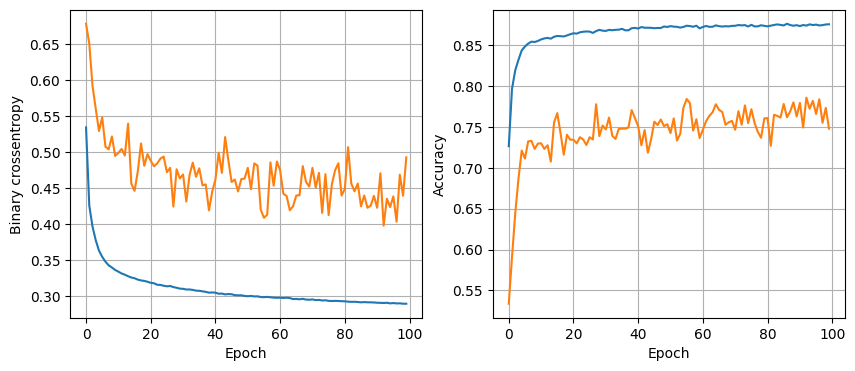

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8661 - loss: 0.3140  
16 nodes, dropout 0, lr 0.001, batch size 128


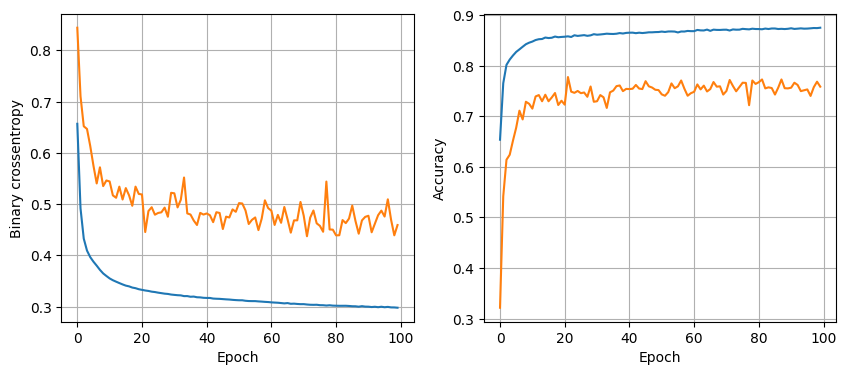

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8647 - loss: 0.3280
16 nodes, dropout 0.2, lr 0.01, batch size 32


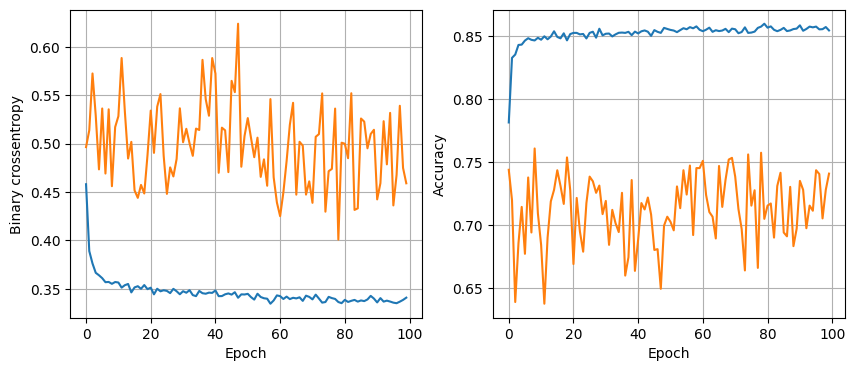

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8662 - loss: 0.3232
16 nodes, dropout 0.2, lr 0.01, batch size 64


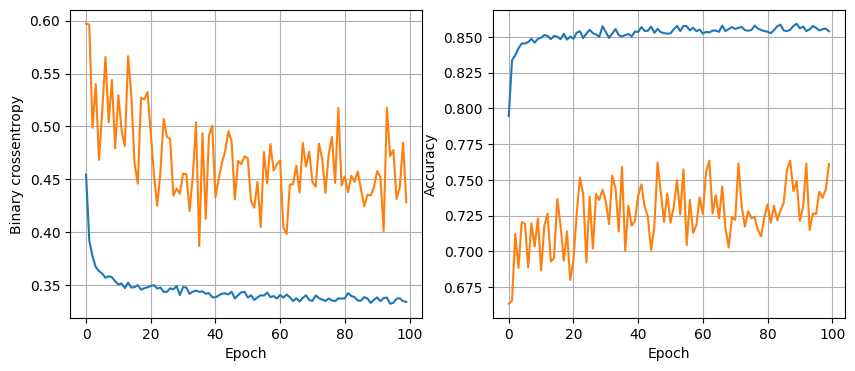

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8646 - loss: 0.3338
16 nodes, dropout 0.2, lr 0.01, batch size 128


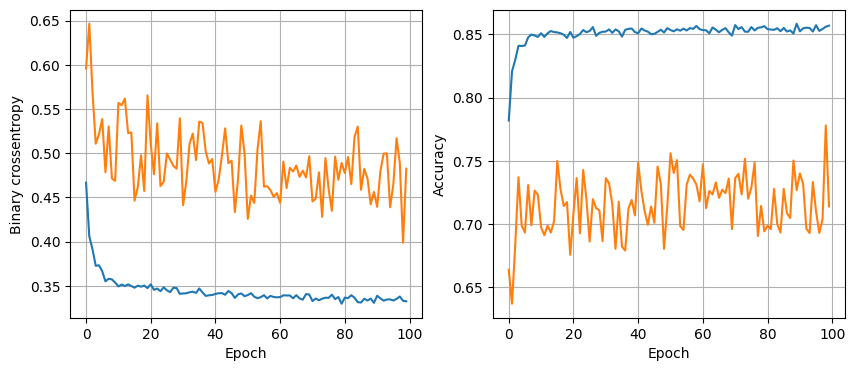

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8552 - loss: 0.3339
16 nodes, dropout 0.2, lr 0.005, batch size 32


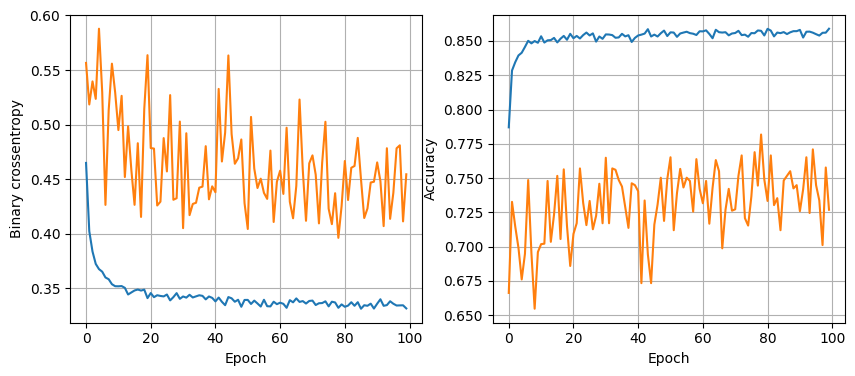

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8601 - loss: 0.3361
16 nodes, dropout 0.2, lr 0.005, batch size 64


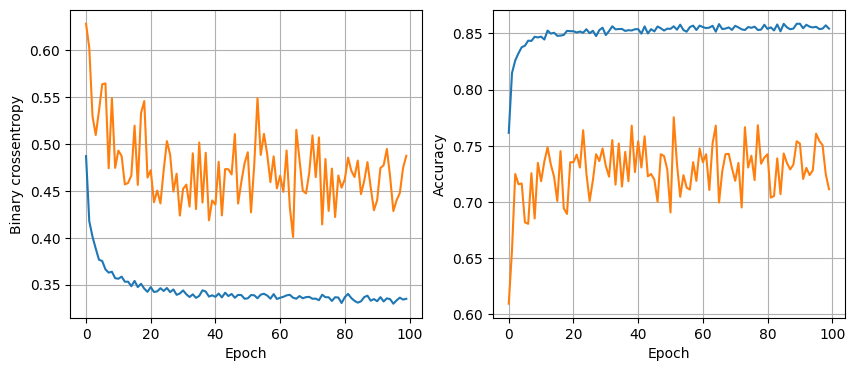

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8672 - loss: 0.3262
16 nodes, dropout 0.2, lr 0.005, batch size 128


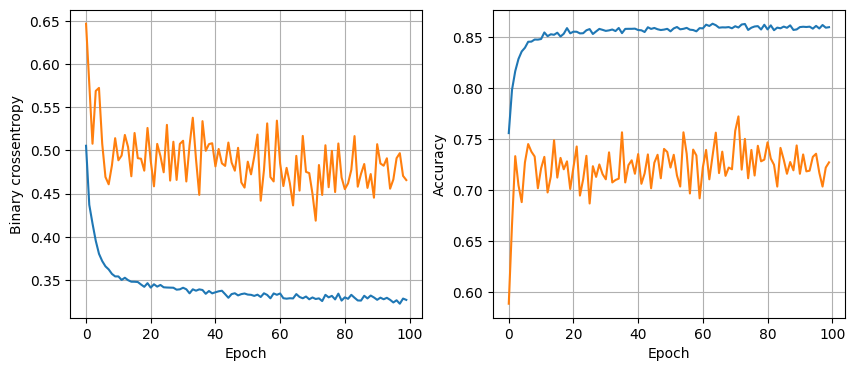

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8550 - loss: 0.3246
16 nodes, dropout 0.2, lr 0.001, batch size 32


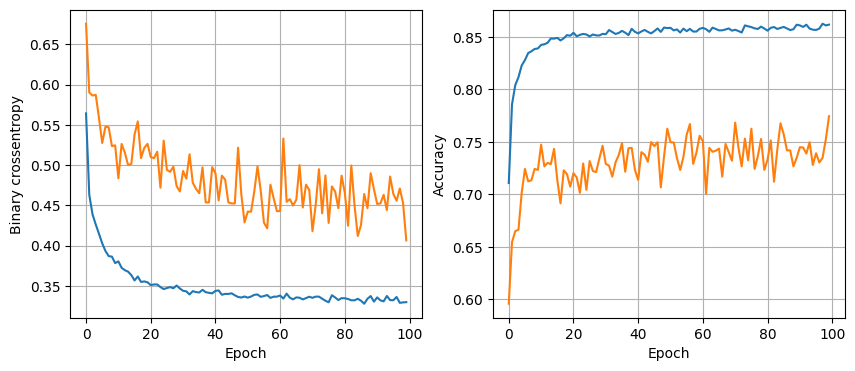

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8596 - loss: 0.3444
16 nodes, dropout 0.2, lr 0.001, batch size 64


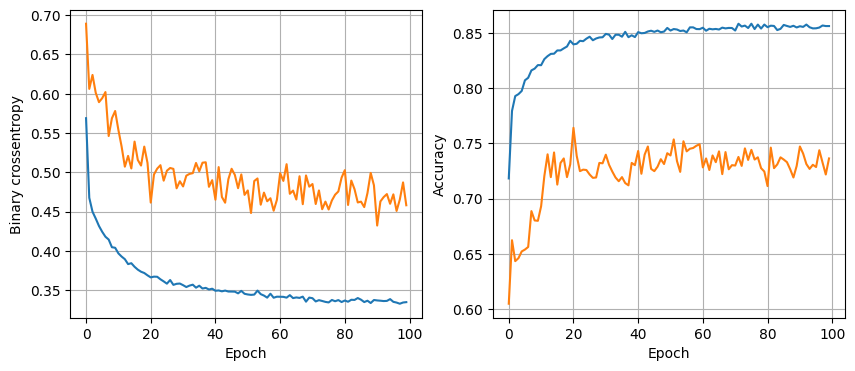

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3305  
16 nodes, dropout 0.2, lr 0.001, batch size 128


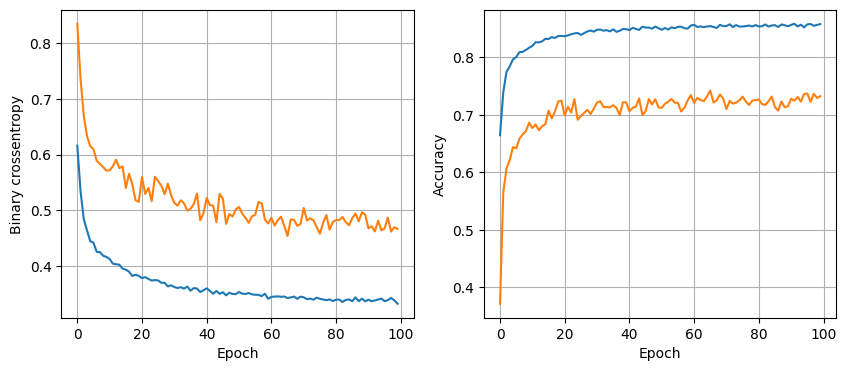

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8668 - loss: 0.3284
32 nodes, dropout 0, lr 0.01, batch size 32


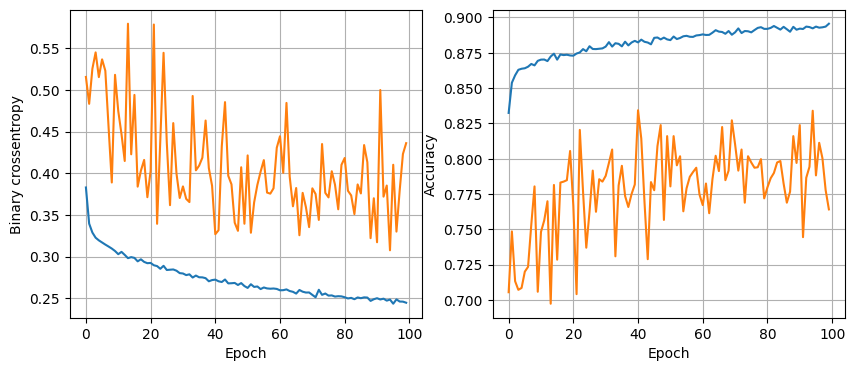

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8566 - loss: 0.3964  
32 nodes, dropout 0, lr 0.01, batch size 64


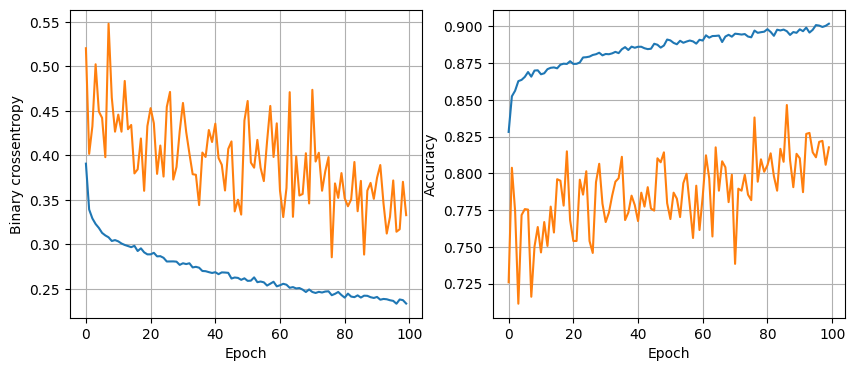

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8511 - loss: 0.4363
32 nodes, dropout 0, lr 0.01, batch size 128


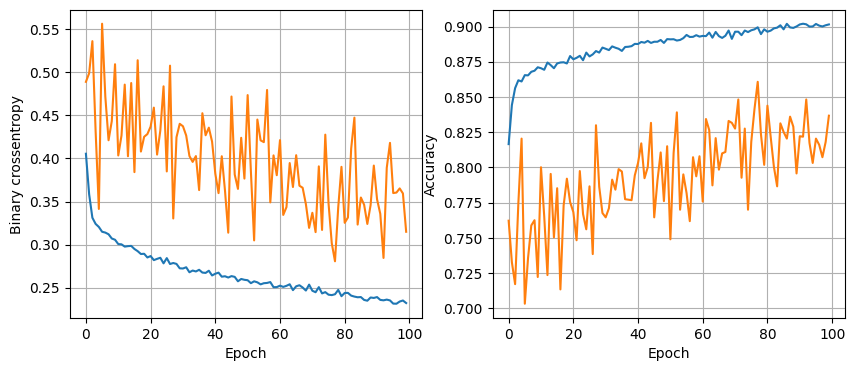

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8483 - loss: 0.3944
32 nodes, dropout 0, lr 0.005, batch size 32


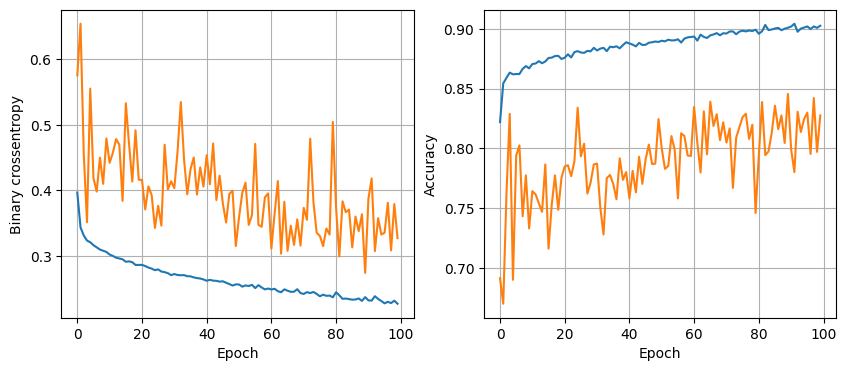

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8523 - loss: 0.4175
32 nodes, dropout 0, lr 0.005, batch size 64


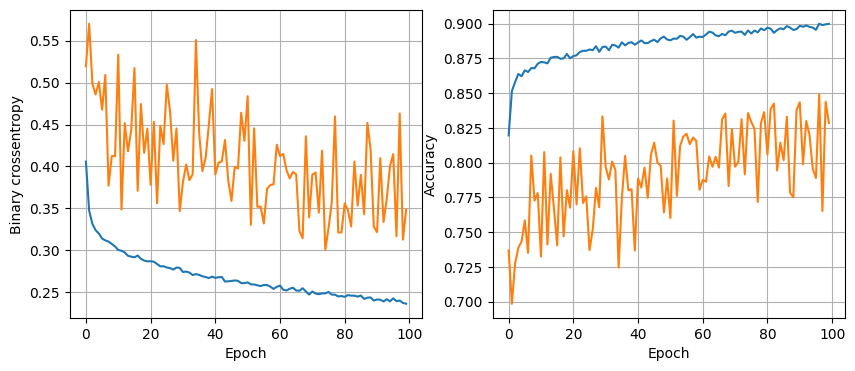

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8545 - loss: 0.3783
32 nodes, dropout 0, lr 0.005, batch size 128


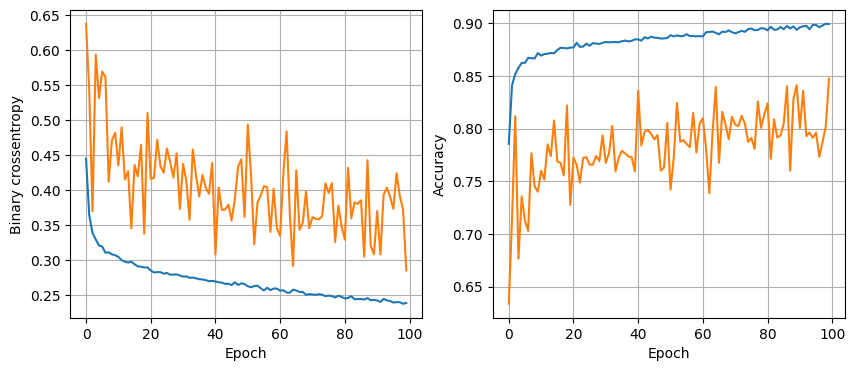

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8327 - loss: 0.4208
32 nodes, dropout 0, lr 0.001, batch size 32


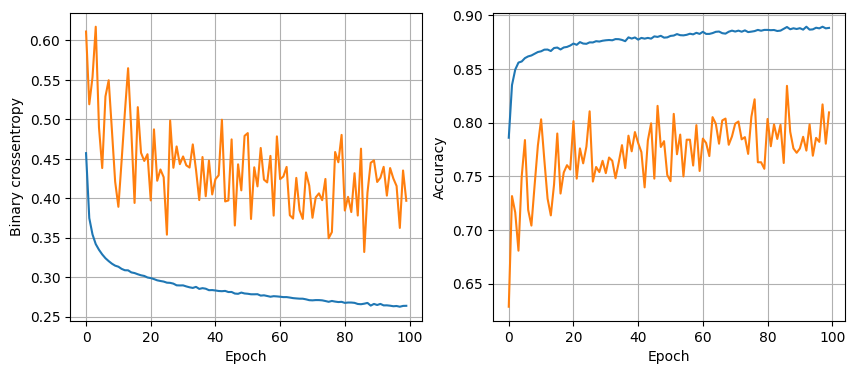

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8625 - loss: 0.3265
32 nodes, dropout 0, lr 0.001, batch size 64


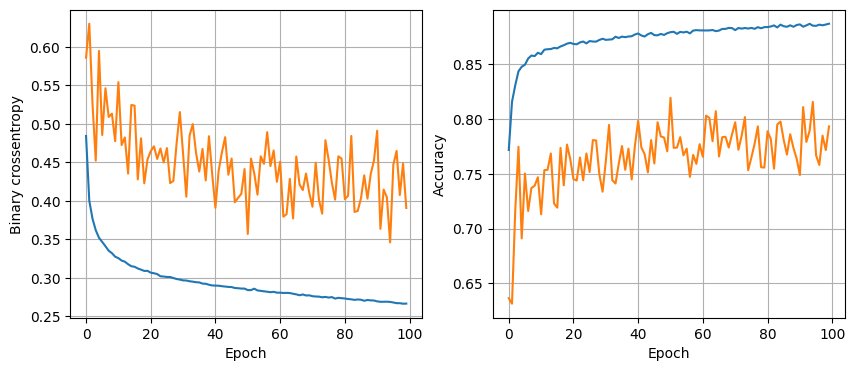

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8626 - loss: 0.3310
32 nodes, dropout 0, lr 0.001, batch size 128


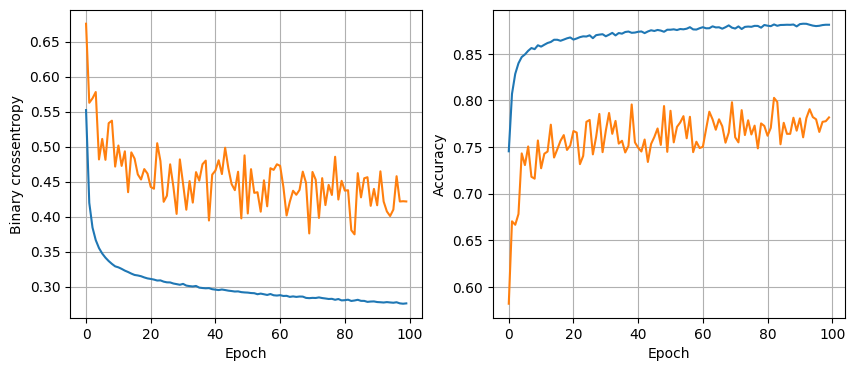

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8623 - loss: 0.3315
32 nodes, dropout 0.2, lr 0.01, batch size 32


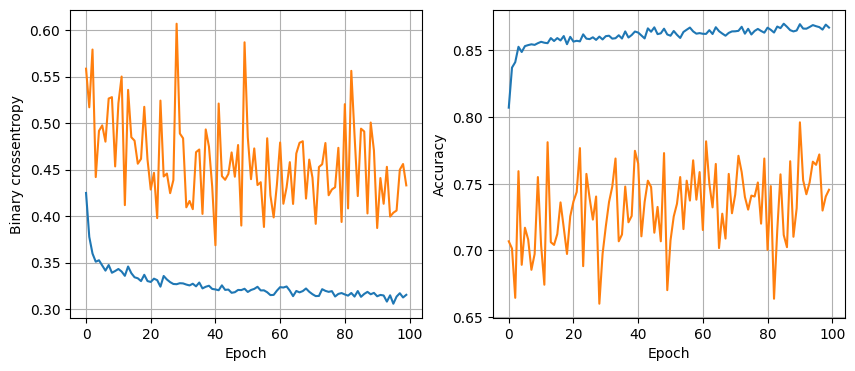

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8707 - loss: 0.3203
32 nodes, dropout 0.2, lr 0.01, batch size 64


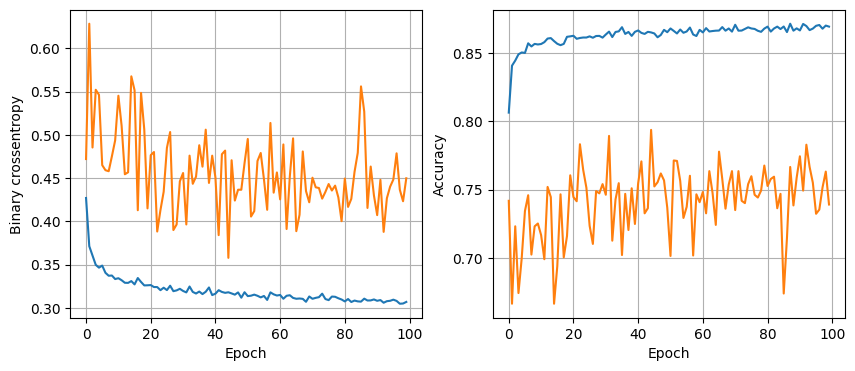

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8679 - loss: 0.3134
32 nodes, dropout 0.2, lr 0.01, batch size 128


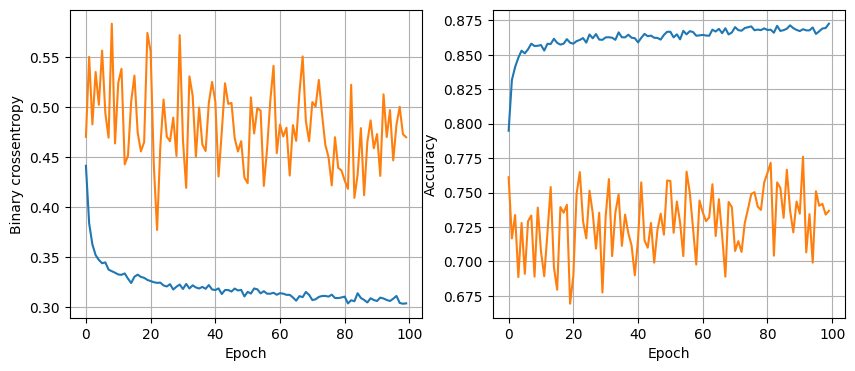

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8619 - loss: 0.3170
32 nodes, dropout 0.2, lr 0.005, batch size 32


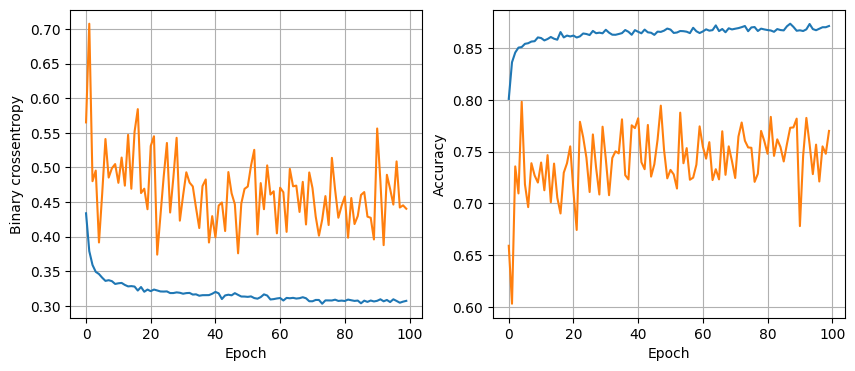

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8686 - loss: 0.3231
32 nodes, dropout 0.2, lr 0.005, batch size 64


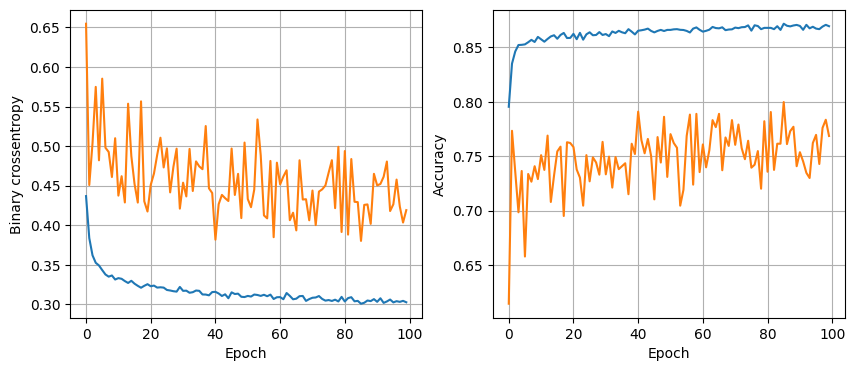

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8687 - loss: 0.3186
32 nodes, dropout 0.2, lr 0.005, batch size 128


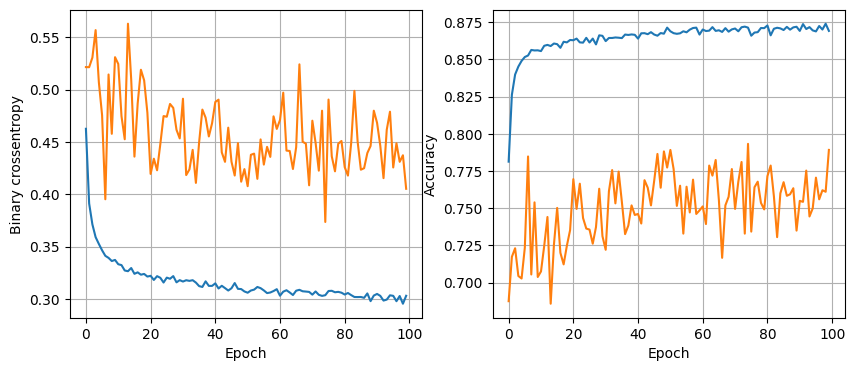

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8649 - loss: 0.3244
32 nodes, dropout 0.2, lr 0.001, batch size 32


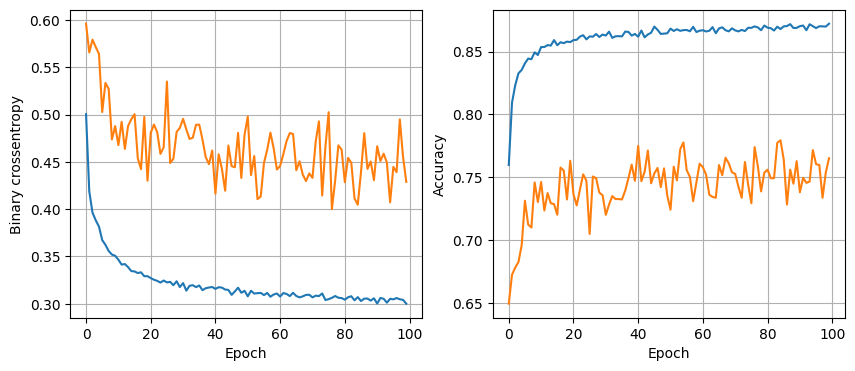

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8745 - loss: 0.3136
32 nodes, dropout 0.2, lr 0.001, batch size 64


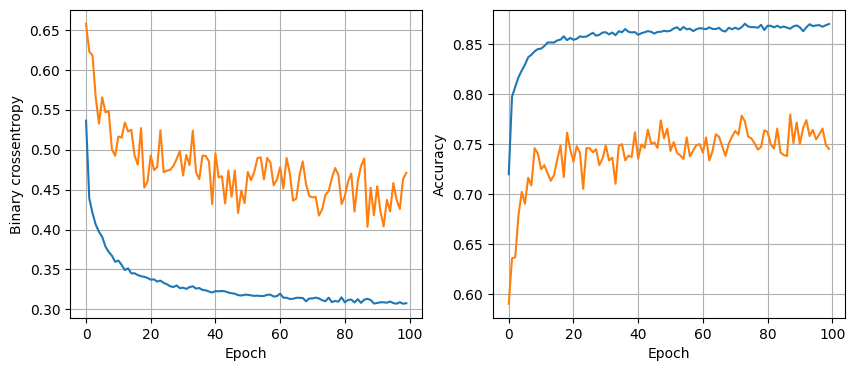

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8661 - loss: 0.3123
32 nodes, dropout 0.2, lr 0.001, batch size 128


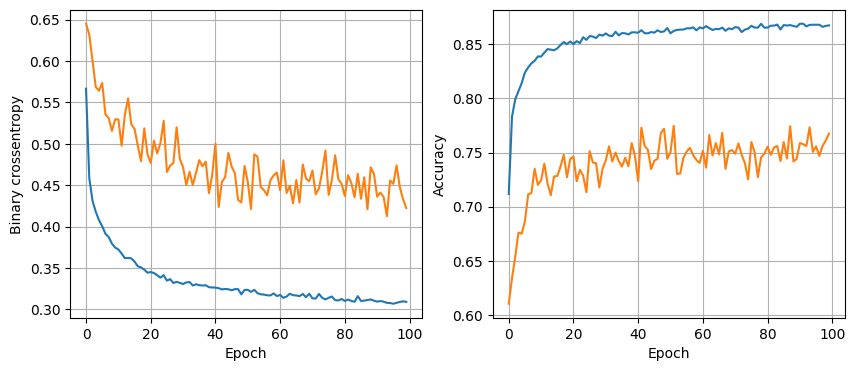

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8611 - loss: 0.3207
64 nodes, dropout 0, lr 0.01, batch size 32


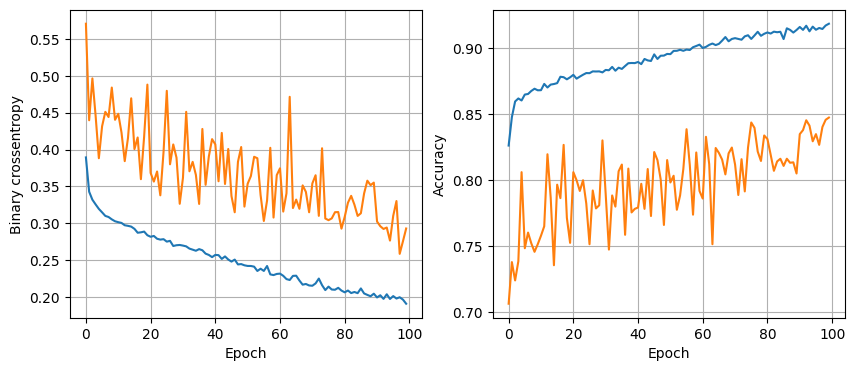

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8521 - loss: 0.5766
64 nodes, dropout 0, lr 0.01, batch size 64


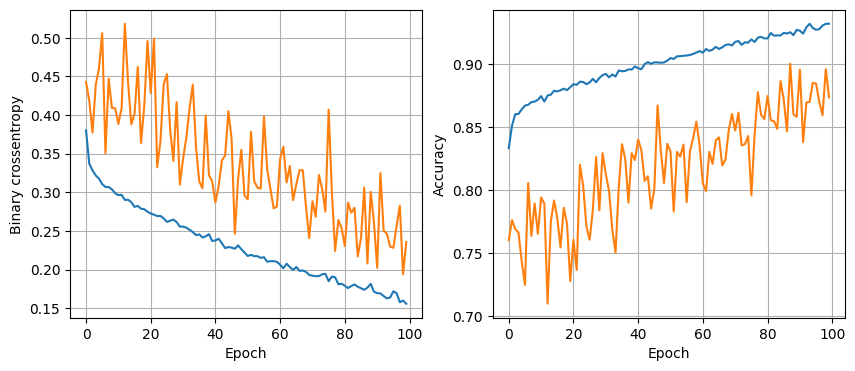

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8414 - loss: 0.6858
64 nodes, dropout 0, lr 0.01, batch size 128


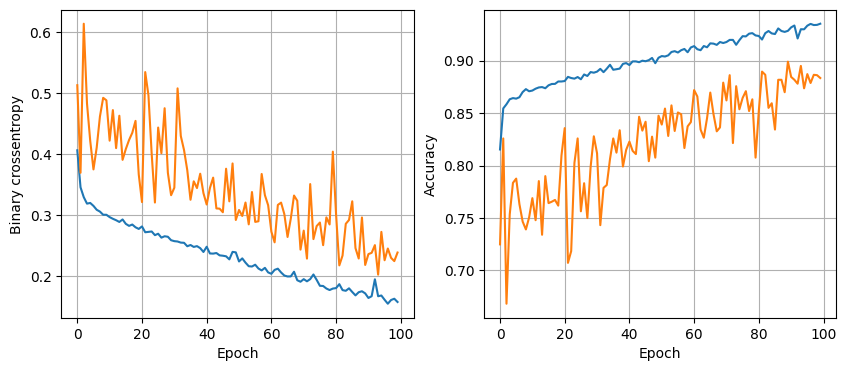

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8382 - loss: 0.6488
64 nodes, dropout 0, lr 0.005, batch size 32


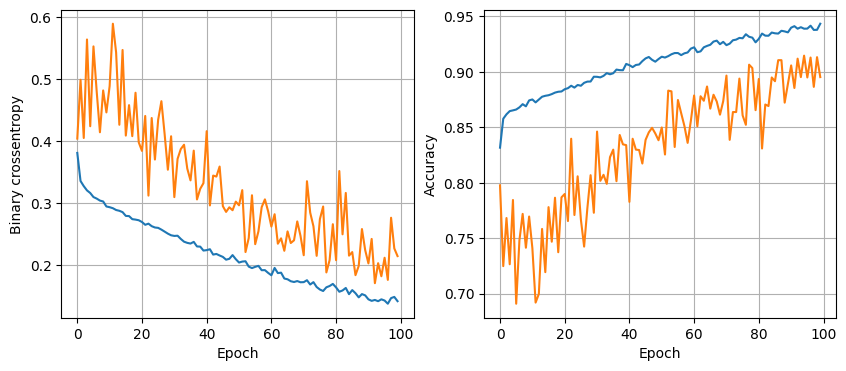

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8451 - loss: 0.6147
64 nodes, dropout 0, lr 0.005, batch size 64


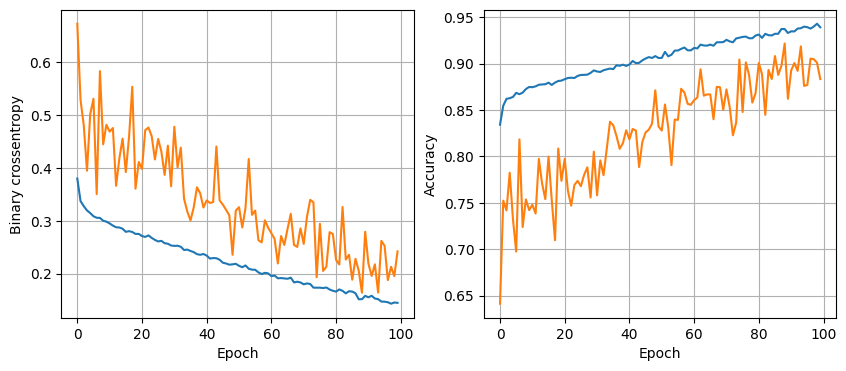

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8407 - loss: 0.5964
64 nodes, dropout 0, lr 0.005, batch size 128


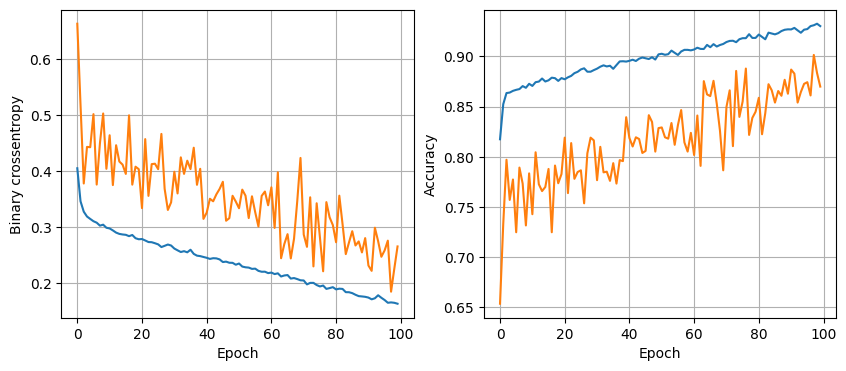

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8483 - loss: 0.5123
64 nodes, dropout 0, lr 0.001, batch size 32


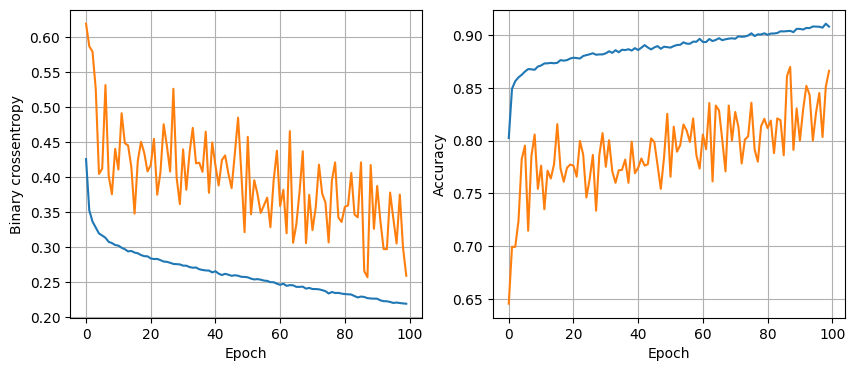

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8467 - loss: 0.3761
64 nodes, dropout 0, lr 0.001, batch size 64


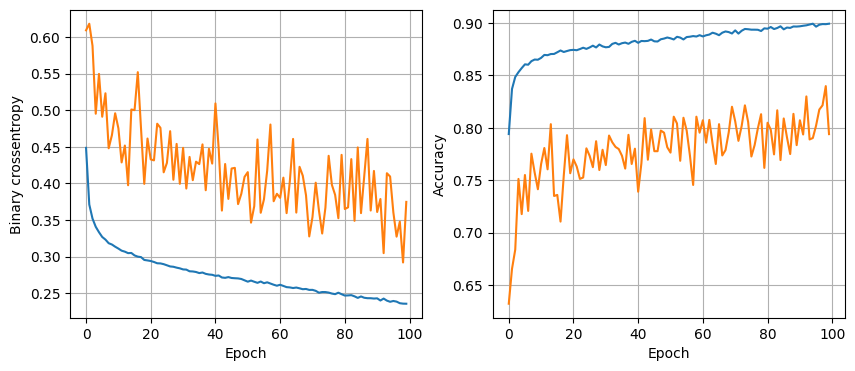

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.3537  
64 nodes, dropout 0, lr 0.001, batch size 128


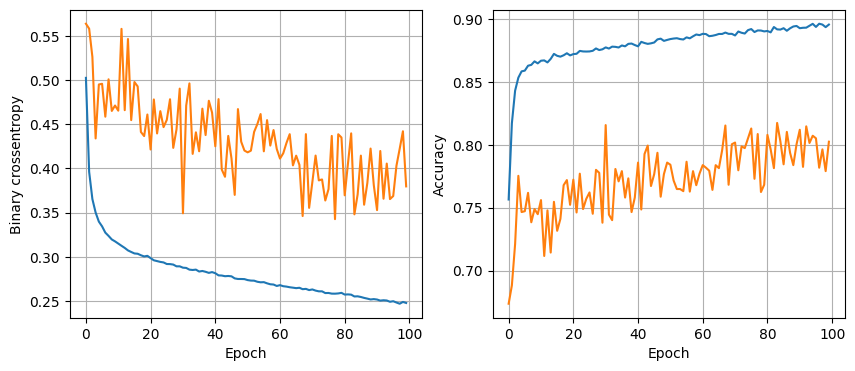

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8597 - loss: 0.3365
64 nodes, dropout 0.2, lr 0.01, batch size 32


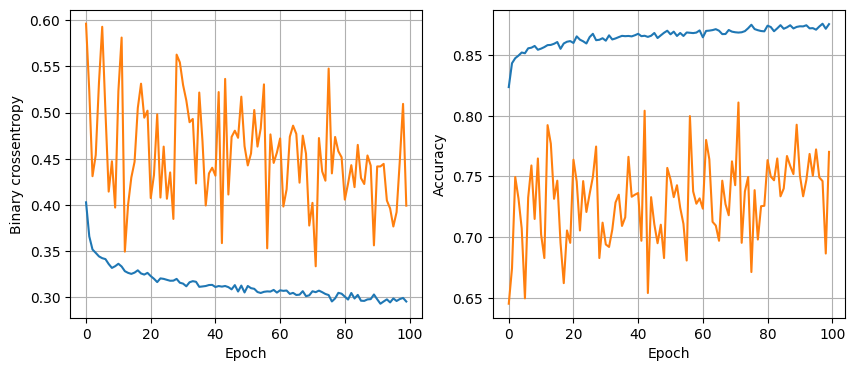

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8715 - loss: 0.3161
64 nodes, dropout 0.2, lr 0.01, batch size 64


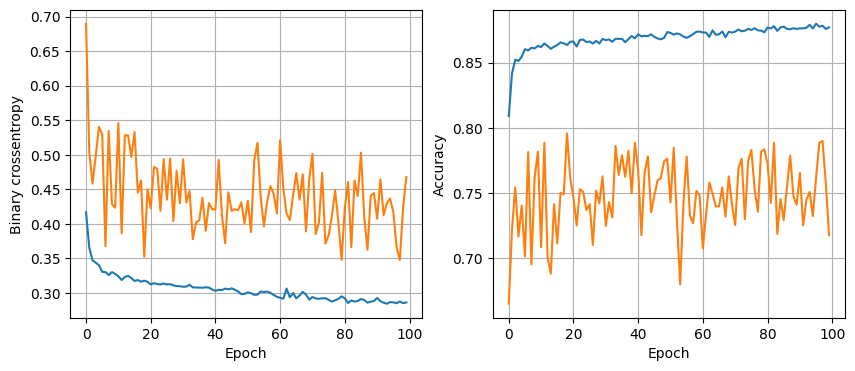

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8630 - loss: 0.3309
64 nodes, dropout 0.2, lr 0.01, batch size 128


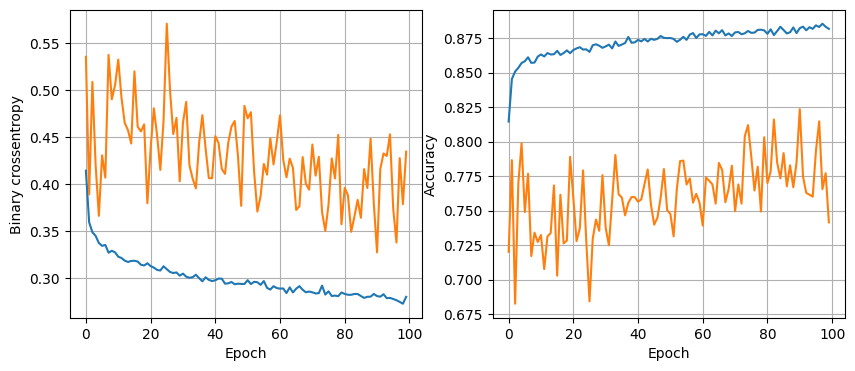

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8696 - loss: 0.3201
64 nodes, dropout 0.2, lr 0.005, batch size 32


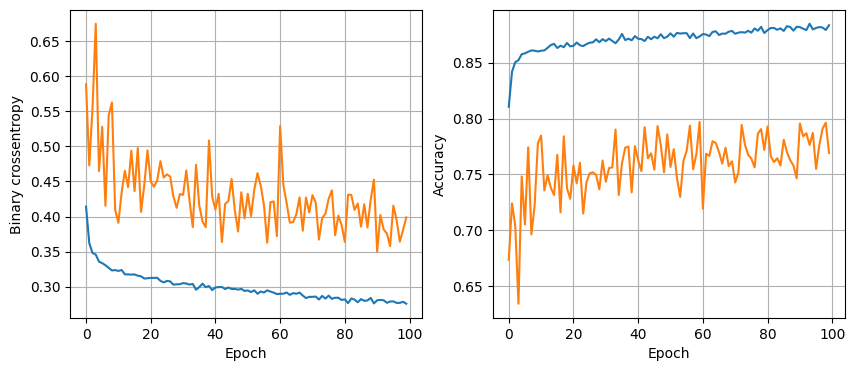

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8691 - loss: 0.3254
64 nodes, dropout 0.2, lr 0.005, batch size 64


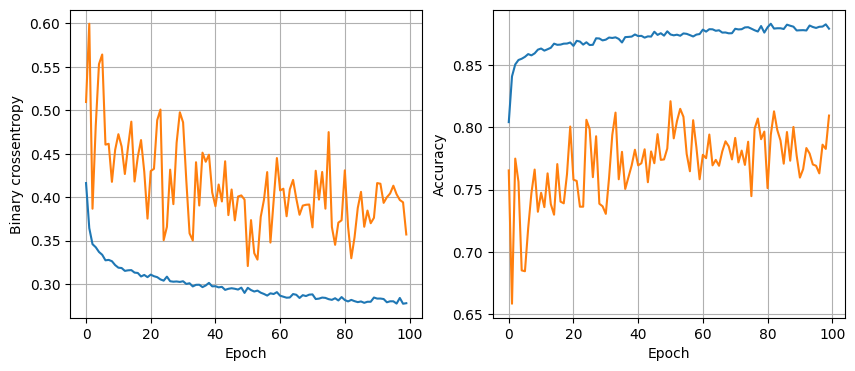

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8731 - loss: 0.3143
64 nodes, dropout 0.2, lr 0.005, batch size 128


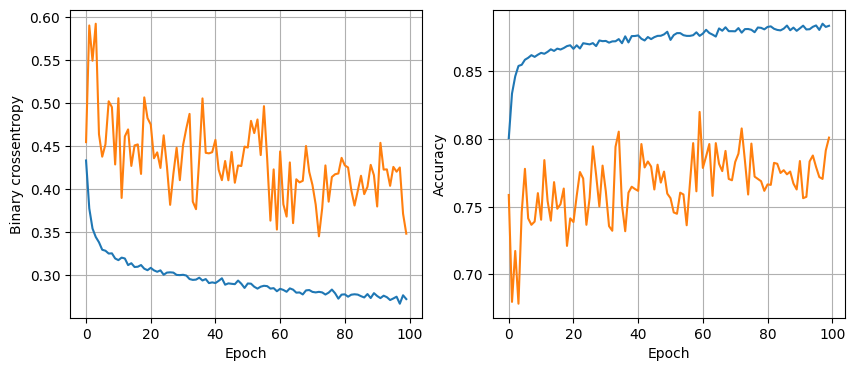

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8647 - loss: 0.3115
64 nodes, dropout 0.2, lr 0.001, batch size 32


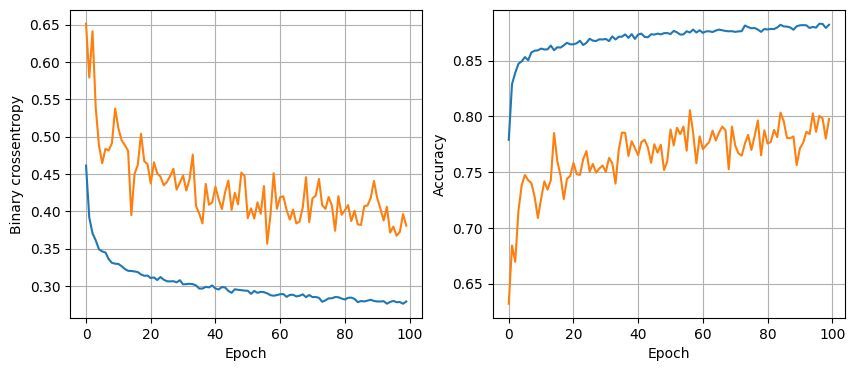

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8700 - loss: 0.3170
64 nodes, dropout 0.2, lr 0.001, batch size 64


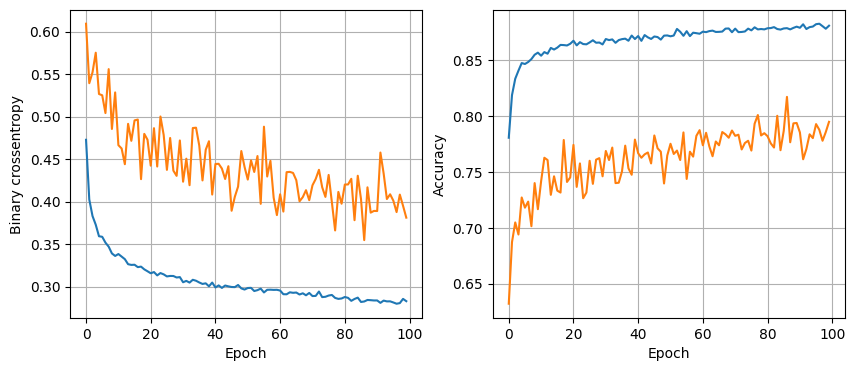

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.3153  
64 nodes, dropout 0.2, lr 0.001, batch size 128


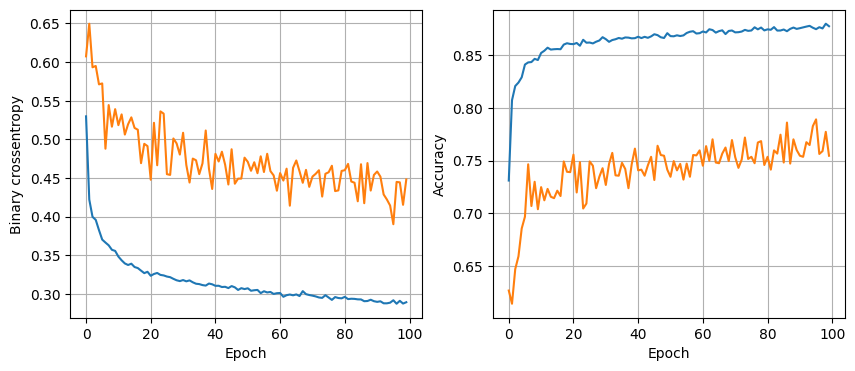

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8699 - loss: 0.3119


In [39]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [40]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,) #化成一维向量
y_pred 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


array([1, 1, 1, ..., 1, 1, 0])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1286
           1       0.89      0.90      0.89      2518

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

